## Breast Cancer Detection

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Step-1 Data Exploration

In [46]:
dataa = pd.read_csv('data.csv')
dataa.head(6)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN


In [47]:
# Check for all the null values
dataa.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
dataa.shape

(569, 33)

In [13]:
# As Unnamed feature have no contribution let's drop it
dataa.dropna(axis = 1 , inplace = True)

In [17]:
dataa.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [23]:
dataa['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

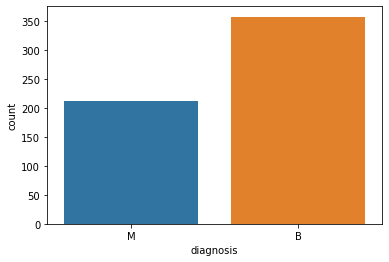

In [24]:
# Let's visualize it
sns.countplot(dataa['diagnosis'])

## Categorical Data

In [25]:
# Alright now let's see all the categorical values
dataa.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [26]:
# Let's encode our label(Diagnosis)
from sklearn.preprocessing import LabelEncoder
lEncode = LabelEncoder()
dataa['diagnosis'] = lEncode.fit_transform(data['diagnosis'])

In [27]:
dataa['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

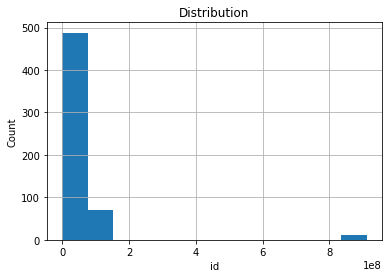

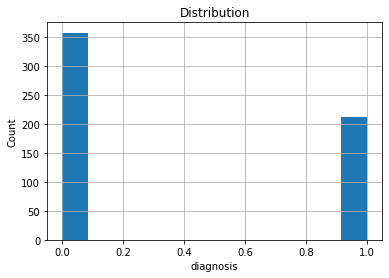

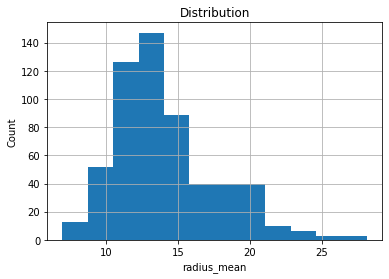

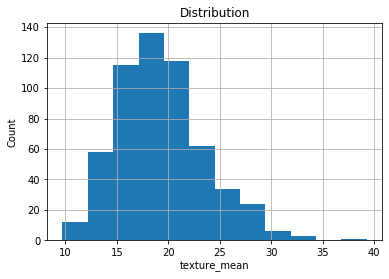

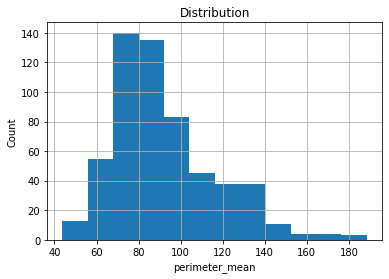

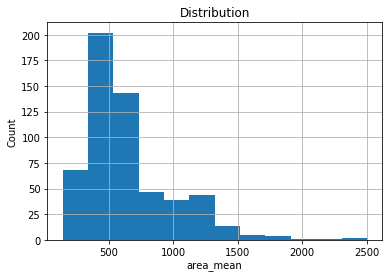

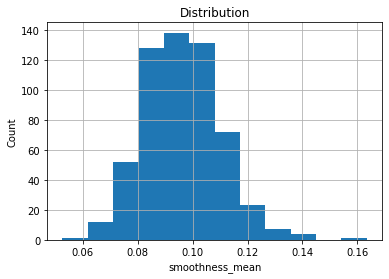

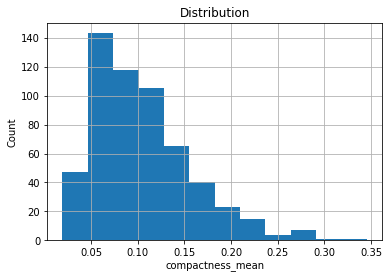

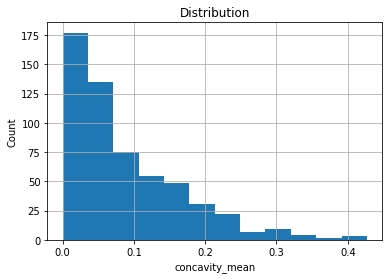

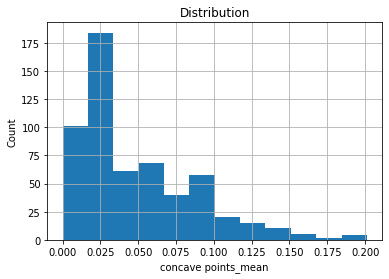

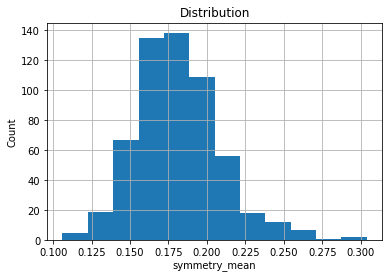

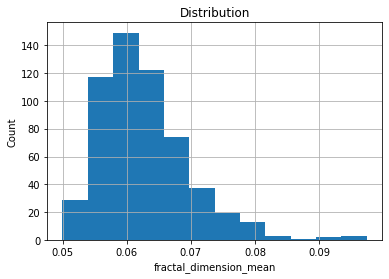

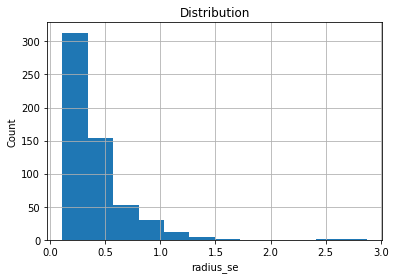

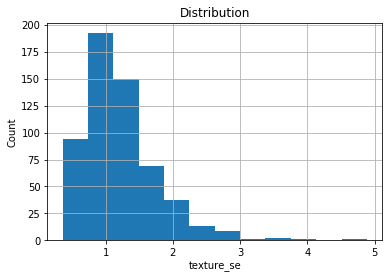

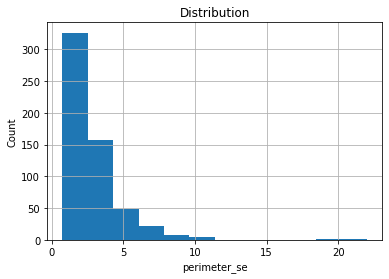

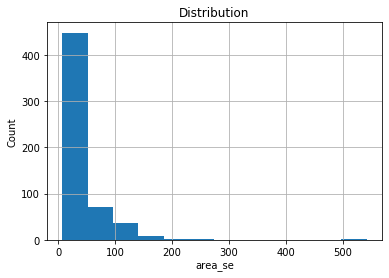

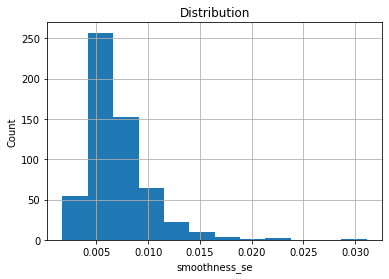

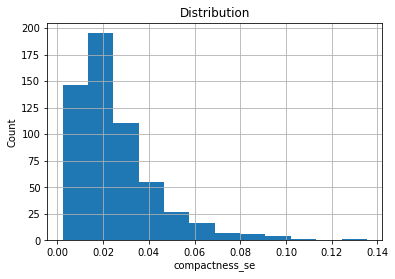

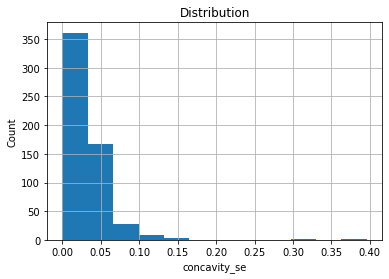

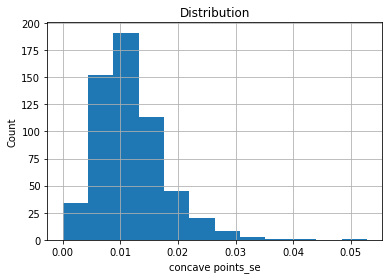

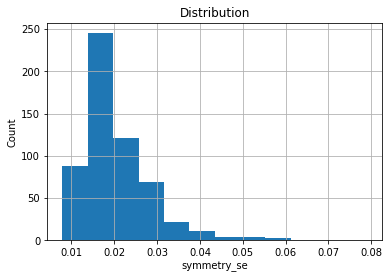

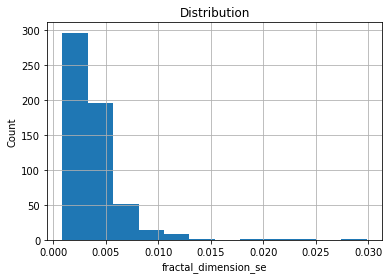

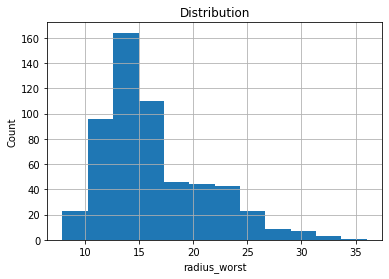

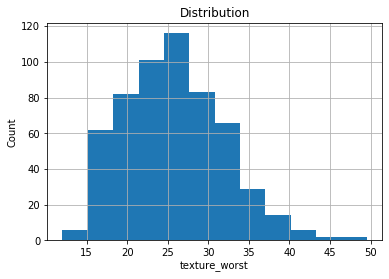

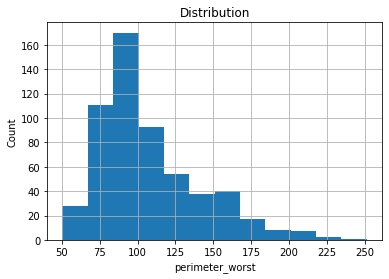

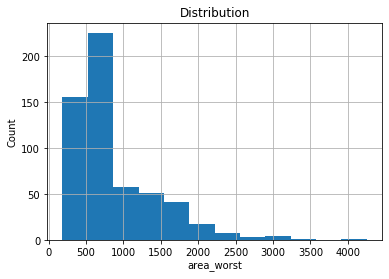

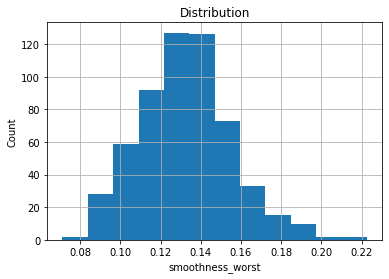

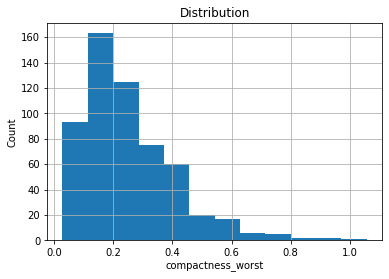

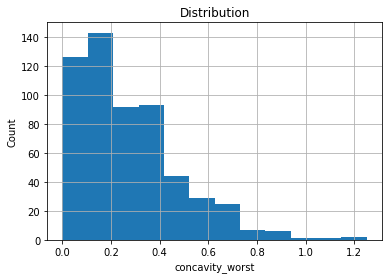

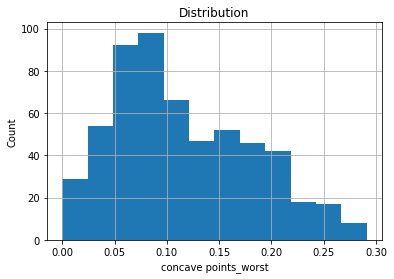

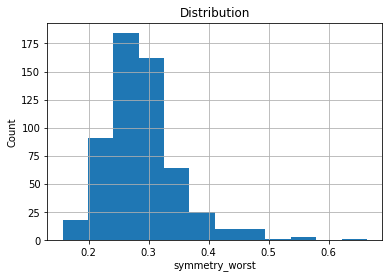

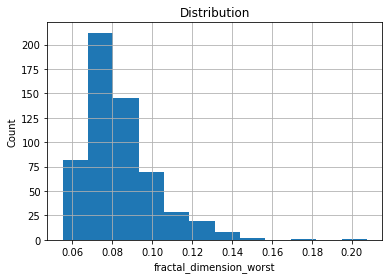

In [30]:
# Let's visualize the distribution of all the feature
for feature in dataa.columns:
    dataa[feature].hist(bins = 12)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title('Distribution')
    plt.show()

In [34]:
x , y = dataa.shape

In [43]:
# Let's normaly distribute every feature using lograthimic Transformation
dataa

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,1.061193,0.850100,1.570813,1.932789,NaN,NaN,NaN,NaN,...,1.173708,1.048174,1.652151,2.029510,NaN,NaN,NaN,NaN,NaN,NaN
1,842517,1,1.106525,1.056926,1.587110,1.972680,NaN,NaN,NaN,NaN,...,1.168908,1.148406,1.622876,2.025336,NaN,NaN,NaN,NaN,NaN,NaN
2,84300903,1,1.091961,1.117224,1.582588,1.959048,NaN,NaN,NaN,NaN,...,1.150564,1.175528,1.614856,2.007363,NaN,NaN,NaN,NaN,NaN,NaN
3,84348301,1,0.890097,1.103452,1.470477,1.784415,NaN,NaN,NaN,NaN,...,0.994004,1.186973,1.524709,1.847130,NaN,NaN,NaN,NaN,NaN,NaN
4,84358402,1,1.101983,0.979473,1.590462,1.969600,NaN,NaN,NaN,NaN,...,1.136323,1.034469,1.614464,1.996333,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,1.121951,1.134177,1.600564,1.987754,NaN,NaN,NaN,NaN,...,1.174559,1.185818,1.631706,2.030030,NaN,NaN,NaN,NaN,NaN,NaN
565,926682,1,1.099349,1.206298,1.584473,1.965665,NaN,NaN,NaN,NaN,...,1.152170,1.293121,1.618085,2.009080,NaN,NaN,NaN,NaN,NaN,NaN
566,926954,1,1.032972,1.204490,1.544346,1.910242,NaN,NaN,NaN,NaN,...,1.079561,1.261265,1.577291,1.949425,NaN,NaN,NaN,NaN,NaN,NaN
567,927241,1,1.107007,1.217465,1.597842,1.966109,NaN,NaN,NaN,NaN,...,1.178054,1.301355,1.652151,2.015855,NaN,NaN,NaN,NaN,NaN,NaN
